# Spring 2020 CS4641 Project


### Environment Setup

In [1]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_pickle('dataframe_with_vector_compressed.pkl', compression='zip')

In [4]:
df.head(10)

,track_id,artist_name,duration,loudness,tempo,title,year,lyrics,tags,lyrics_vector
0,TRMMMKI128F931D80D,Lena Philipsson,262.26893,-3.925,122.332,006,1998,"1:23,2:5,3:13,4:10,5:4,6:9,7:1,8:4,9:4,10:1,11...","[[swedish, 100], [pop, 100]]","[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ..."
1,TRMMMUT128F42646E8,Shawn Colvin,216.47628,-14.379,99.214,(Looking For) The Heart Of Saturday,1994,"2:36,3:25,4:2,5:8,6:2,7:1,8:6,10:8,12:5,13:19,...","[[cover, 100]]","[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ..."
2,TRMMMQY128F92F0EA3,Dying Fetus,196.02240,-6.366,189.346,Ethos of Coercion,2009,"2:10,3:1,4:2,5:1,9:1,10:1,13:9,14:2,18:1,21:1,...","[[Technical Death Metal, 100], [Brutal Death M...","[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,..."
3,TRMMMTK128F424EF7C,Emery,217.57342,-4.867,88.423,Rock-N-Rule,2007,"1:20,2:8,3:15,4:4,5:5,6:6,7:2,8:9,9:12,10:2,11...","[[post-hardcore, 100], [emo, 75], [rock, 50], ...","[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ..."
4,TRMMMQV12903CA201E,Rev. Timothy Wright,353.77587,-7.569,167.850,I Made It Over,0,"1:24,2:1,3:15,4:4,5:4,7:4,8:12,11:2,35:4,40:2,...","[[THE WRIGHT WAY, 100]]","[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ..."
5,TRMMMNO128F93539AA,Martin Sexton,319.81669,-7.185,187.378,In The Journey,2001,"1:30,2:15,3:4,4:6,5:15,6:5,7:3,8:13,9:11,10:6,...","[[singer-songwriter, 100], [rock, 66], [jazz, ...","[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2..."
6,TRMMMPJ128F9306985,Christian Castro,258.89914,-4.660,157.862,Tu Vida Con La Mía,0,"6:1,7:2,38:11,42:5,47:3,77:15,90:6,102:5,104:4...","[[cristian castro, 100], [azul, 100], [Roma, 5...","[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
7,TRMMMRZ128F4265EB4,Aerosmith,253.70077,-3.278,67.060,I'm Ready,2004,"1:23,2:1,3:13,4:2,5:2,6:5,7:4,8:2,9:2,12:1,13:...","[[classic rock, 100], [rock, 83], [hard rock, ...","[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0..."
8,TRMMMKQ128F92EBCB5,Kreator,372.42730,-6.663,191.665,All of the same blood,2001,"2:12,3:2,4:3,5:4,10:2,12:1,13:9,15:2,17:1,21:2...","[[thrash metal, 100], [metal, 32], [thrash, 23...","[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,..."
9,TRMMMBU128F9305AC3,The Maytals,175.20281,-9.049,156.753,Night And Day,1994,"1:6,2:4,3:4,4:2,5:7,10:1,11:5,13:1,21:2,27:1,2...","[[reggae, 100], [rocksteady, 75], [EARLY REGGA...","[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ..."


# Year Analysis

Here we are seeing if ML models can predict which year or decade a song was released based on the lyrics.


## Preprocessng The Data

In [5]:
# Getting the list of words so we can map features to words
import json
with open("word_list.json", 'r') as w:
    word_list = list(json.load(w))

In [6]:
df['year'].describe()

count    237662.000000
mean       1473.147659
std         879.327036
min           0.000000
25%           0.000000
50%        1996.000000
75%        2004.000000
max        2010.000000
Name: year, dtype: float64

To make the analysis simpler, we are binning the release date into decades.

In [7]:
def bin_year(row):
    year = row['year']
    decade = int(np.floor(year / 10) * 10)
    return decade
#####

# Adding a column for the year
df['year_decade'] = df.apply(bin_year, axis=1)



In [8]:
# Creating new data frame with the columns we care about
df_year = df
to_drop = ['artist_name', 'duration', 'lyrics', 'tempo', 'loudness', 'title', 'tags'] # add back 'year'
df_year = df_year.drop(to_drop, axis = 1)

df_year = df_year.replace(0, np.nan)
df_year = df_year.dropna(how='any', axis=0)
df_year.head()

,track_id,year,lyrics_vector,year_decade
0,TRMMMKI128F931D80D,1998.0,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",1990.0
1,TRMMMUT128F42646E8,1994.0,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",1990.0
2,TRMMMQY128F92F0EA3,2009.0,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",2000.0
3,TRMMMTK128F424EF7C,2007.0,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",2000.0
5,TRMMMNO128F93539AA,2001.0,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2...",2000.0


In [9]:
df_year['year_decade'].describe()

count    175234.000000
mean       1993.030805
std          10.378616
min        1920.000000
25%        1990.000000
50%        2000.000000
75%        2000.000000
max        2010.000000
Name: year_decade, dtype: float64

# PCA Analysis

From the data with valid decade values, we want to use PCA to see if there is a clustering for the years based on the lyrics using a bag-of-words model for the lyrics (a one-hot vector). This will give us some intial insight into what our data looks like.

In [9]:
# Combining the lyrics vectors into a matrix. In this dataset there are 5001 features (words)
X_lyrics = np.array(df_year["lyrics_vector"].values.tolist())
y_decade = np.array(df_year["year_decade"])
y_year = np.array(df_year["year"])

print("Shape of X_lyrics: (%d, %d)" % X_lyrics.shape)

Shape of X_lyrics: (175234, 5001)


One-hot vectors tend to be mostly 0's (No song has 5001 unique words), so the `X_lyrics` matrix is very sparse. To perform PCA, we use the [TruncatedSVD model from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), which handles sparse matrices more efficiently. We picked n = 3 to be the number of components so we can plot it in 3D space.

This will output the new coordinates for each datapoint based on the new principal components. It will also calculate the explained variance of each of the components.

In [10]:
# Apply PCA for 3D plotting
print("Starting PCA Decomposition ...")
pca = decomposition.TruncatedSVD(n_components=10)
print("Fitting Data ...")
pca.fit(X_lyrics)
print("Finished!")

print("Transforming X ...")
X_lyrics_transform = pca.transform(X_lyrics)
print(X_lyrics_transform.shape)

Starting PCA Decomposition ...
Fitting Data ...
Finished!


In [19]:
exp_var = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
print("First 10 PC's")
print("Variance")
print(exp_var)
print("Variance ratio")
print(exp_var_ratio)
print("Explained Variance: %.7f" % np.sum(exp_var_ratio))

print("\nFirst 3 PC's")
print("Variance")
print(exp_var[:3])
print("Variance ratio")
print(exp_var_ratio[:3])
print("Explained Variance: %.7f" % np.sum(exp_var_ratio[:3]))

First 10 PC's
Variance
[257.85023587  87.69936178  65.28193602  32.7362166   29.87755968
  27.71817239  21.96855455  20.73181524  18.38654619  17.00446685]
Variance ratio
[0.18398737 0.06257731 0.0465815  0.02335872 0.02131894 0.01977812
 0.01567552 0.01479305 0.0131196  0.01213343]
Explained Variance: 0.4133236

First 3 PC's
Variance
[257.85023587  87.69936178  65.28193602]
Variance ratio
[0.18398737 0.06257731 0.0465815 ]
Explained Variance: 0.2931462


In [13]:
# Plot PCA
df_year['pca_1'] = X_lyrics_transform[:,0]
df_year['pca_2'] = X_lyrics_transform[:,1]
df_year['pca_3'] = X_lyrics_transform[:,2]
df_year['pca_4'] = X_lyrics_transform[:,3]
df_year['pca_5'] = X_lyrics_transform[:,4]
df_year['pca_6'] = X_lyrics_transform[:,5]
df_year['pca_7'] = X_lyrics_transform[:,6]
df_year['pca_8'] = X_lyrics_transform[:,7]
df_year['pca_9'] = X_lyrics_transform[:,8]
df_year['pca_10'] = X_lyrics_transform[:,9]

pd.DataFrame(X_lyrics_transform).to_pickle("pca_year.pkl")

df_year.head()

,track_id,year,lyrics_vector,year_decade,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,TRMMMKI128F931D80D,1998.0,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",1990.0,30.723007,-9.311266,6.357729,0.347388,-2.614726,-5.657605,2.293224,-4.480751,1.248333,5.564041
1,TRMMMUT128F42646E8,1994.0,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",1990.0,38.052834,21.547568,-22.597430,14.306624,-8.636265,5.528362,3.415578,-6.044007,-0.093354,-2.674966
2,TRMMMQY128F92F0EA3,2009.0,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",2000.0,7.340893,8.449408,-1.640457,2.711822,-2.592571,0.520723,-2.375322,-0.319565,-0.887830,1.313323
3,TRMMMTK128F424EF7C,2007.0,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",2000.0,31.726309,-7.335365,0.755192,-0.426007,5.239326,-0.500660,-3.856442,-6.051179,1.646299,0.459452
5,TRMMMNO128F93539AA,2001.0,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2...",2000.0,42.800372,0.866155,14.018142,-2.248625,10.883699,-3.510198,-7.031744,-3.422261,-6.187457,-8.185762


Here is a 2-D plot by only using the first 2 principle components (columns `pca_1` and `pca_2`) and coloring by the decades using matplotlib plotting package

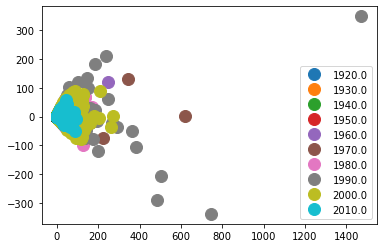

In [14]:
decade_groups = df_year.groupby('year_decade')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in decade_groups:
    ax.plot(group.pca_1, group.pca_2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

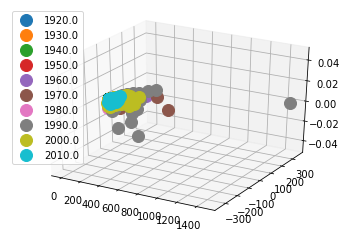

In [15]:
# By year
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.scatter(X_lyrics_transform[:,0], X_lyrics_transform[:,1], X_lyrics_transform[:,2], c=y_year,cmap='rainbow')

for name, group in decade_groups:
    ax.plot(group.pca_1, group.pca_2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [1]:
# import plotly.express as px

# fig = px.scatter_3d(df_year, x = "pca_1", y = "pca_2", z = "pca_2", color='year_decade')
# fig.show()

PCA did not really give us a good visual for an initial clustering of the lyrics based on decades. Another problem is that the majority of the data with valid years are after 1990, which means it will be difficult to get a good clustering between the decades.

Additionally, PCA cannot give us a clear idea of what words (our features) are most informative. Since it created a new set of axis, we cannot make any concrete assertions about what words are more useful in determining what year a song was released.

# Linear Regression

It seems possible that a linear combination of certain words can indicate what year a particular set of lyrics may have been released. If certain words are only used in particular years, then the model can weight it so that if it does exist, it will map to a particular numerical value related to the year.

In [10]:
# Create training and test sets

def create_train_test_sets(X_data, y_data, percent_train):
    
    N,D = X_data.shape
    test_percent = 1 - percent_train
    
    train_idx = int(percent_train * N)

    X_train = X_data[:train_idx,:]
    y_train = y_data[:train_idx]

    X_test = X_data[train_idx:,:]
    y_test = y_data[train_idx:]
    
    return X_train,y_train,X_test, y_test

def decade_accuracy(y_pred, y_truth):
    y_pred_round = np.around(y_pred, -1) # optional: This is just to 
    are_correct = y_pred_round == y_truth
    error = np.sum(are_correct) / float(are_correct.shape[0])
    return error

def year_accuracy_window(y_pred, y_truth, margin=5):
    # Check if the predicted y is within +- margin of error from the ground truth
    
    num_correct = np.sum([diff < margin for diff in np.absolute(y_pred - y_truth)])
    
    return float(num_correct) / len(y_pred)

def cross_validation(X, y, kfold, model, accuracy_type):
    
    N,D = X.shape
    
    test_correct = 0
    train_correct = 0
    
    for i in range(kfold):
        
        # kfold indices
        idx_l = int(i * N / kfold)
        idx_r = int((i + 1) * N / kfold )
        
        # Train and test sets
        x_test = X[idx_l:idx_r, :]
        x_train = np.concatenate((X[:idx_l,:], X[idx_r:,:]), axis=0)
        
        y_test = y[idx_l:idx_r]
        y_train = np.concatenate((y[0:idx_l], y[idx_r:]))

        # Run linear regression
        reg = model.fit(x_train, y_train)
        y_predict = reg.predict(x_test)
        
        test_correct_score = accuracy_type(y_predict, y_test)
        test_correct += test_correct_score
        
        train_correct_score = accuracy_type(reg.predict(x_train), y_train)
        train_correct += train_correct_score
    #####
    
    return test_correct / kfold, train_correct / kfold
        

## Raw Linear Regression

Here we use the raw lyrics data to perform linear regression

In [66]:
X_lyrics = np.array(df_year["lyrics_vector"].values.tolist())
N,D = X_lyrics.shape
y_year = np.array(df_year["year_decade"])

X_train,y_train,X_test, y_test = create_train_test_sets(X_lyrics, y_year, percent_train=0.9)

In [71]:
reg = LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)

# Classification accuracy
reg_test_accuracy = decade_accuracy(y_predict, y_test)
reg_train_accuracy = decade_accuracy(reg.predict(X_train), y_train)
print("Decade Method")
print("Linear Regression Test Accuracy: %.10f" % reg_test_accuracy)
print("Linear Regression Train Accuracy: %.10f" % reg_train_accuracy)

Linear Regression Test Accuracy: 0.3967701438
Linear Regression Train Accuracy: 0.4139116099


In [72]:
# try ridge regression
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_ridge_predict = ridge.predict(X_test)

# Classification accuracy
ridge_test_accuracy = decade_accuracy(y_ridge_predict, y_test)
ridge_train_accuracy = decade_accuracy(ridge.predict(X_train), y_train)
print("Decade Method")
print("Ridge Regression Test Accuracy: %.10f" % ridge_test_accuracy)
print("Ridge Regression Train Accuracy: %.10f" % ridge_train_accuracy)


Ridge Regression Test Accuracy: 0.3967701438
Ridge Regression Train Accuracy: 0.4138418616


In [73]:
# Try Lasso for sparse coefficients
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_lasso_predict = lasso.predict(X_test)

# Classification accuracy
lasso_test_accuracy = decade_accuracy(y_lasso_predict, y_test)
lasso_train_accuracy = decade_accuracy(lasso.predict(X_train), y_train)
print("Decade Method")
print("Lasso Regression Test Accuracy: %.10f" % lasso_test_accuracy)
print("Lasso Regression Train Accuracy: %.10f" % lasso_train_accuracy)


Lasso Regression Test Accuracy: 0.3236133303
Lasso Regression Train Accuracy: 0.3273603449


Linear Regression appears to do the best, though all three perform similarly. We can treat the resulting coefficients as an indicator of importance of each of the words.

In [86]:
# Did not remove the first 20 words/features, so no offset

imp = np.argsort(reg.coef_)
k = 20
first_k = imp[:k]


print("First k")
print(first_k)
for i in first_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

print("Last k")
last_k = imp[-k:]
print(last_k)
for i in last_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

First k
[3581 4632 4321 4862 4998 3774 1098 3966 3757 3890 4672 2029 4150 4284
 4351 4593 4121 2255 4397 4742]
Coef: -2.2453759540 	 word: evri
Coef: -1.9399942575 	 word: richard
Coef: -1.8038249137 	 word: chart
Coef: -1.7986888418 	 word: ace
Coef: -1.7887489026 	 word: gee
Coef: -1.7523535324 	 word: untru
Coef: -1.6538062036 	 word: instrument
Coef: -1.5458699864 	 word: fellow
Coef: -1.5304532511 	 word: peak
Coef: -1.4867664455 	 word: plea
Coef: -1.4813542708 	 word: vieux
Coef: -1.4459829998 	 word: vocal
Coef: -1.4101841628 	 word: gambl
Coef: -1.3683219431 	 word: gloom
Coef: -1.3572978012 	 word: suo
Coef: -1.3562225959 	 word: joli
Coef: -1.3303535542 	 word: lamp
Coef: -1.3205910926 	 word: album
Coef: -1.2498726575 	 word: pane
Coef: -1.2354267611 	 word: neat
Last k
[4885 2434 2211 3396 3910 4217 4366 4891 4574 3833 2880 4567 4908 4479
 4228 4191 4310 4777 4340    0]
Coef: 0.9050577339 	 word: naiv
Coef: 0.9147590819 	 word: unfold
Coef: 0.9266846614 	 word: x4
Coef: 0.

In [85]:
imp = np.argsort(ridge.coef_)

k = 20
first_k = imp[:k]


print("First k")
print(first_k)
for i in first_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

print("Last k")
print(last_k)
last_k = imp[-k:]

for i in last_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

First k
[3581 4632 4321 4862 4998 3774 1098 3966 3757 3890 4672 2029 4150 4284
 4351 4593 4121 2255 4397 4742]
Coef: -2.2453759540 	 word: evri
Coef: -1.9399942575 	 word: richard
Coef: -1.8038249137 	 word: chart
Coef: -1.7986888418 	 word: ace
Coef: -1.7887489026 	 word: gee
Coef: -1.7523535324 	 word: untru
Coef: -1.6538062036 	 word: instrument
Coef: -1.5458699864 	 word: fellow
Coef: -1.5304532511 	 word: peak
Coef: -1.4867664455 	 word: plea
Coef: -1.4813542708 	 word: vieux
Coef: -1.4459829998 	 word: vocal
Coef: -1.4101841628 	 word: gambl
Coef: -1.3683219431 	 word: gloom
Coef: -1.3572978012 	 word: suo
Coef: -1.3562225959 	 word: joli
Coef: -1.3303535542 	 word: lamp
Coef: -1.3205910926 	 word: album
Coef: -1.2498726575 	 word: pane
Coef: -1.2354267611 	 word: neat
Last k
[3812 4885 2434 2211 3396 3910 4217 4366 4891 4574 3833 2880 4567 4908
 4479 4228 4191 4310 4777 4340]
Coef: 0.9038852089 	 word: olhar
Coef: 0.9050577339 	 word: naiv
Coef: 0.9147590819 	 word: unfold
Coef:

In [87]:
imp = np.argsort(lasso.coef_)
k = 20
first_k = imp[:k]


print("First k")
print(first_k)
for i in first_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

print("Last k")
print(last_k)
last_k = imp[-k:]

for i in last_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

First k
[245 120 285 380  73 225  27 396 593 274 444 215 106 271  85 506 638 367
  60 599]
Coef: -0.4258285730 	 word: blue
Coef: -0.3442853714 	 word: well
Coef: -0.3996929199 	 word: yes
Coef: -0.3339662228 	 word: music
Coef: -0.1696224639 	 word: babi
Coef: -0.1835266080 	 word: old
Coef: -0.1448876780 	 word: love
Coef: -0.4055367491 	 word: fool
Coef: -0.3978274244 	 word: honey
Coef: -0.2148679478 	 word: sweet
Coef: -0.2238330971 	 word: woman
Coef: -0.1823493205 	 word: peopl
Coef: -0.1476105818 	 word: man
Coef: -0.3382398741 	 word: must
Coef: -0.1333110157 	 word: night
Coef: -0.4905685920 	 word: veri
Coef: -0.2909829346 	 word: goin
Coef: -0.2958106451 	 word: lone
Coef: -0.0487766135 	 word: he
Coef: -0.2755648964 	 word: mama
Last k
[4885 2434 2211 3396 3910 4217 4366 4891 4574 3833 2880 4567 4908 4479
 4228 4191 4310 4777 4340    0]
Coef: 0.1178449147 	 word: insid
Coef: 0.0672635893 	 word: from
Coef: 0.1173904468 	 word: wanna
Coef: 0.1213738937 	 word: end
Coef: 0.2

## By Window Method

In [11]:
X_lyrics = np.array(df_year["lyrics_vector"].values.tolist())
N,D = X_lyrics.shape
y_year = np.array(df_year["year"])

X_train,y_train,X_test, y_test = create_train_test_sets(X_lyrics, y_year, percent_train=0.9)

In [12]:
reg = LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)

# Classification accuracy
reg_test_accuracy = year_accuracy_window(y_predict, y_test)
reg_train_accuracy = year_accuracy_window(reg.predict(X_train), y_train)
print("Window Method")
print("Linear Regression Test Accuracy: %.10f" % reg_test_accuracy)
print("Linear Regression Train Accuracy: %.10f" % reg_train_accuracy)

Window Method
Linear Regression Test Accuracy: 0.4237046336
Linear Regression Train Accuracy: 0.4361169235


In [13]:
# try ridge regression
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_ridge_predict = ridge.predict(X_test)

# Classification accuracy
ridge_test_accuracy = year_accuracy_window(y_ridge_predict, y_test)
ridge_train_accuracy = year_accuracy_window(ridge.predict(X_train), y_train)
print("Window Method")
print("Ridge Regression Test Accuracy: %.10f" % ridge_test_accuracy)
print("Ridge Regression Train Accuracy: %.10f" % ridge_train_accuracy)

Window Method
Ridge Regression Test Accuracy: 0.4237046336
Ridge Regression Train Accuracy: 0.4361296050


In [14]:
# Try Lasso for sparse coefficients
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_lasso_predict = lasso.predict(X_test)

# Classification accuracy
lasso_test_accuracy = year_accuracy_window(y_lasso_predict, y_test)
lasso_train_accuracy = year_accuracy_window(lasso.predict(X_train), y_train)
print("Window Method")
print("Lasso Regression Test Accuracy: %.10f" % lasso_test_accuracy)
print("Lasso Regression Train Accuracy: %.10f" % lasso_train_accuracy)

Window Method
Lasso Regression Test Accuracy: 0.3877539375
Lasso Regression Train Accuracy: 0.3872867922


In [15]:
# Linear
imp = np.argsort(reg.coef_)
k = 20
first_k = imp[:k]


print("First k")
print(first_k)
for i in first_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

print("Last k")
last_k = imp[-k:]
print(last_k)
for i in last_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

First k
[3581 4632 1098 4321 4862 3774 4998 3757 2255 4351 2029 3890 3966 4121
 4672 4593 4284 4580 4742 4485]
Coef: -2.4143913821 	 word: evri
Coef: -2.1400109303 	 word: richard
Coef: -1.9375839161 	 word: instrument
Coef: -1.9128065631 	 word: chart
Coef: -1.7519975024 	 word: ace
Coef: -1.7277160385 	 word: untru
Coef: -1.7119661231 	 word: gee
Coef: -1.4935066391 	 word: peak
Coef: -1.4672365895 	 word: album
Coef: -1.4655479867 	 word: suo
Coef: -1.4473518186 	 word: vocal
Coef: -1.4381624407 	 word: plea
Coef: -1.4350658230 	 word: fellow
Coef: -1.4052530783 	 word: lamp
Coef: -1.3501483799 	 word: vieux
Coef: -1.3292005262 	 word: joli
Coef: -1.3054992475 	 word: gloom
Coef: -1.2732558616 	 word: daß
Coef: -1.2581822166 	 word: neat
Coef: -1.2473175300 	 word: robin
Last k
[2943 4342 2211 4974 4864 4567 4228 4765 4217 4785 4615 4310 4191 4366
 4908 3833 4479 4777 4340    0]
Coef: 0.9418746311 	 word: choir
Coef: 0.9478514304 	 word: tryna
Coef: 0.9524897446 	 word: x4
Coef: 0.9

In [16]:
# Ridge
imp = np.argsort(ridge.coef_)
k = 20
first_k = imp[:k]


print("First k")
print(first_k)
for i in first_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

print("Last k")
last_k = imp[-k:]
print(last_k)
for i in last_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

First k
[3581 4632 1098 4321 4862 3774 4998 3757 2255 4351 2029 3890 3966 4121
 4672 4593 4284 4580 4742 4485]
Coef: -2.4143913821 	 word: evri
Coef: -2.1400109303 	 word: richard
Coef: -1.9375839161 	 word: instrument
Coef: -1.9128065631 	 word: chart
Coef: -1.7519975024 	 word: ace
Coef: -1.7277160385 	 word: untru
Coef: -1.7119661231 	 word: gee
Coef: -1.4935066391 	 word: peak
Coef: -1.4672365895 	 word: album
Coef: -1.4655479867 	 word: suo
Coef: -1.4473518186 	 word: vocal
Coef: -1.4381624407 	 word: plea
Coef: -1.4350658230 	 word: fellow
Coef: -1.4052530783 	 word: lamp
Coef: -1.3501483799 	 word: vieux
Coef: -1.3292005262 	 word: joli
Coef: -1.3054992475 	 word: gloom
Coef: -1.2732558616 	 word: daß
Coef: -1.2581822166 	 word: neat
Coef: -1.2473175300 	 word: robin
Last k
[2822 2943 4342 2211 4974 4864 4567 4228 4765 4217 4785 4615 4310 4191
 4366 4908 3833 4479 4777 4340]
Coef: 0.9411100708 	 word: collid
Coef: 0.9418746311 	 word: choir
Coef: 0.9478514304 	 word: tryna
Coef:

In [17]:
# Lasso
imp = np.argsort(lasso.coef_)
k = 20
first_k = imp[:k]


print("First k")
print(first_k)
for i in first_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

print("Last k")
last_k = imp[-k:]
print(last_k)
for i in last_k:
    print("Coef: %.10f \t word: %s" % (reg.coef_[i], word_list[i]))
#####

First k
[245 120 285 380  73 225 396  27 593 274 444 271 215 106 599 506 367  85
 638  60]
Coef: -0.4290796149 	 word: blue
Coef: -0.3437646452 	 word: well
Coef: -0.4104220844 	 word: yes
Coef: -0.3242717027 	 word: music
Coef: -0.1726901462 	 word: babi
Coef: -0.2003903931 	 word: old
Coef: -0.4231587144 	 word: fool
Coef: -0.1448604989 	 word: love
Coef: -0.4043826581 	 word: honey
Coef: -0.2190345835 	 word: sweet
Coef: -0.2263231544 	 word: woman
Coef: -0.3652684379 	 word: must
Coef: -0.1848290601 	 word: peopl
Coef: -0.1518522814 	 word: man
Coef: -0.2918013121 	 word: mama
Coef: -0.4922343003 	 word: veri
Coef: -0.3100662186 	 word: lone
Coef: -0.1311665864 	 word: night
Coef: -0.2877288351 	 word: goin
Coef: -0.0468782070 	 word: he
Last k
[346  14  59 130 190  97  19  38 150 164 261 125 142 181 132  87 169 192
  30 283]
Coef: 0.2446613974 	 word: beauti
Coef: 0.0544904881 	 word: your
Coef: 0.0737416349 	 word: from
Coef: 0.1200102258 	 word: wanna
Coef: 0.0906206590 	 word: 

## PCA Linear Regression

We expect lower testing accuracy since PCA did not recover the total amount of variance in the data.

In [47]:
from sklearn import linear_model

In [48]:
X_pca_year_lyrics = pd.read_pickle("pca_year.pkl").to_numpy()
N,K = X_pca_year_lyrics.shape # N datapoints, K PC's
print(X_pca_year_lyrics.shape)

(175234, 10)


### By Decades

In [44]:
train_percent = 0.9
y_decade = np.array(df_year["year_decade"])


In [56]:
lin_test_correct, lin_train_correct = cross_validation(X_pca_year_lyrics, y_decade,10, linear_model.LinearRegression(), decade_accuracy)
print("Linear Regression Test Average Performance: %.10f" % lin_test_correct)
print("Linear Regression Train Average Performance: %.10f" % lin_train_correct)


# Best results by adjusting alpha
ridge_test_correct = 0
ridge_train_correct = 0
for i in range(1, 1000, 10):
    test_correct, train_correct = cross_validation(X_pca_year_lyrics, y_decade,10, linear_model.Ridge(alpha=i), decade_accuracy)
    if test_correct > ridge_test_correct: 
        ridge_test_correct = test_correct
        ridge_train_correct = train_correct
    #####
#####
print("\nRidge Regression Test Average Performance: %.10f" % ridge_test_correct)
print("Ridge Regression Train Average Performance: %.10f" % ridge_train_correct)

# Best results by adjusting alpha
lasso_test_correct = 0
lasso_train_correct = 0
lamb = np.arange(0.1, 2, 0.1)
for i in range(len(lamb)):
    test_correct, train_correct = cross_validation(X_pca_year_lyrics, y_decade,10, linear_model.Lasso(alpha=lamb[i]), decade_accuracy)
    if test_correct > lasso_test_correct: 
        lasso_test_correct = test_correct
        lasso_train_correct = train_correct
    #####
print("\nLasso Regression Test Average Performance: %.10f" % lasso_test_correct)
print("Lasso Regression Train Average Performance: %.10f" % lasso_train_correct)




Linear Regression Test Average Performance: 0.2680529677
Linear Regression Train Average Performance: 0.2682077167
Ridge Regression Test Average Performance: 0.2680586745
Ridge Regression Train Average Performance: 0.2682070826
Lasso Regression Test Average Performance: 0.2670714202
Lasso Regression Train Average Performance: 0.2671310612


Ridge and Lasso regression did not show a significant improvement, and the training and testing accuracy is about the same, which indicates that the these models are not overfitting.

### By raw year and window accuracy measurement.

Instead of strict decades, we predict the year. It is correct if it is within 5 years of the actual release date.

In [60]:
y_year = np.array(df_year["year"])

lin_test_correct, lin_train_correct = cross_validation(X_pca_year_lyrics, y_year,10, linear_model.LinearRegression(), year_accuracy_window)
print("Linear Regression Test Average Performance: %.10f" % lin_test_correct)
print("Linear Regression Train Average Performance: %.10f" % lin_train_correct)


# Best results by adjusting alpha
ridge_test_correct = 0
ridge_train_correct = 0
for i in range(1, 1000, 50):
    test_correct, train_correct  = cross_validation(X_pca_year_lyrics, y_year,10, linear_model.Ridge(alpha=i), year_accuracy_window)
    if test_correct > ridge_test_correct: 
        ridge_test_correct = test_correct
        ridge_train_correct = train_correct
    #####
print("\nRidge Regression Test Average Performance: %.10f" % ridge_test_correct)
print("Ridge Regression Train Average Performance: %.10f" % ridge_train_correct)


# Best results by adjusting alpha
lasso_test_correct = 0
lasso_train_correct = 0
lamb = np.arange(0.1, 2, 0.1)
for i in range(len(lamb)):
    test_correct, train_correct = cross_validation(X_pca_year_lyrics, y_year,10, linear_model.Lasso(alpha=lamb[i]), year_accuracy_window)
    if test_correct > lasso_test_correct: 
        lasso_test_correct = test_correct
        lasso_train_correct = train_correct
    #####
print("\nLasso Regression Test Average Performance: %.10f" % lasso_test_correct)
print("Lasso Regression Train Average Performance: %.10f" % lasso_train_correct)

Linear Regression Test Average Performance: 0.3588915168
Linear Regression Train Average Performance: 0.3588262299

Ridge Regression Test Average Performance: 0.3588972233
Ridge Regression Train Average Performance: 0.3588255958

Lasso Regression Test Average Performance: 0.3585148755
Lasso Regression Train Average Performance: 0.3585504084


The above results are based on running linear regression on the first 10 PC's from the lyrics. Evaluating by strict decades performed worse with about 25% error of predicting a year in the same decade as the song was released. Linear Regression performed better when checking if the year was within 5 years of the release year with 35% accuracy. 

For both kinds of accuracy measurements, Ridge and Lasso can do marginally better than regular linear regression with the right parameters. This is is evident, as linear regression's training and testing errors are very similar, so it is not overfitting.

The linear regression model ends up evaluating to only predict 1990 or 2000. This is not completely surprising, as least 50% of the data with decades information falls in the 1990s - 2000 range. So linear regression just picked a line that reflected the "weighted average" of the years it could pick from. So in this case, just knowing what the distribution of the years provided better information to predict in a linear regression model.

We could try using more PC's, but the amount of variance the last few PC's contribute is only 1%. It will take a large number of PC's to fully recover the variance, and at this point we should just see how accurate linear regression is on the full raw dataset. 

# Random Forest

In [10]:
X_lyrics = np.array(df_year["lyrics_vector"].values.tolist())
y_year = np.array(df_year["year"])
# X_train,y_train,X_test, y_test = create_train_test_sets(X_lyrics, y_year, percent_train=0.9)



In [14]:
offset = 20 # Ignoring the first 20 - 1 = 19 words, which are stop words


X_lyrics_remove_common_words = X_lyrics[:,offset:]

X_train,y_train,X_test, y_test = create_train_test_sets(X_lyrics_remove_common_words, y_year, percent_train=0.9)
min_depth = 2
max_depth = 50

depths = range(min_depth, max_depth, 2)

test_accuracies = np.zeros(len(depths))
train_accuracies = np.zeros(len(depths))

clf_models = list()


In [15]:
for i in range(len(depths)):
    print("Running with Max Depth: %d" % depths[i])

    clf = RandomForestClassifier(max_depth=depths[i], random_state=0)
    clf.fit(X_train, y_train)
    
    y_test_predict = clf.predict(X_test)
    y_train_predict = clf.predict(X_train)

    test_accuracies[i] = year_accuracy_window(y_test_predict, y_test)
    train_accuracies[i] = year_accuracy_window(y_train_predict, y_train)
    
    clf_models.append(clf)   
#####

print("Done!")

Running with Max Depth: 2
Running with Max Depth: 4
Running with Max Depth: 6
Running with Max Depth: 8
Running with Max Depth: 10
Running with Max Depth: 12
Running with Max Depth: 14
Running with Max Depth: 16
Running with Max Depth: 18
Running with Max Depth: 20
Running with Max Depth: 22
Running with Max Depth: 24
Running with Max Depth: 26
Running with Max Depth: 28
Running with Max Depth: 30
Running with Max Depth: 32
Running with Max Depth: 34
Running with Max Depth: 36
Running with Max Depth: 38
Running with Max Depth: 40
Running with Max Depth: 42
Running with Max Depth: 44
Running with Max Depth: 46
Running with Max Depth: 48
Done!


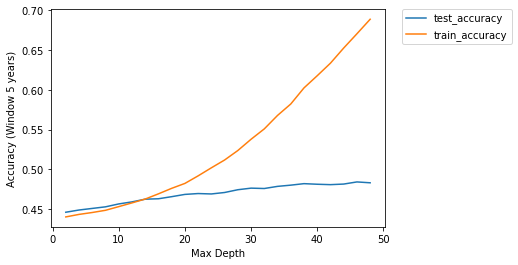

In [60]:
# print(test_accuracies)
fig, ax = plt.subplots()
ax.plot(depths, test_accuracies, label="test_accuracy")
ax.plot(depths, train_accuracies, label="train_accuracy")
ax.set_ylabel('Accuracy (Window 5 years)')
ax.set_xlabel('Max Depth')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [2]:
fh = open("year_RF_accuracies.txt", "w")

fh.write("depth\ttest\ttrain")
for i in range(len(depths)):
    fh.write("%d\t%.10f\t%.10f" % (depths[i], test_accuracies[i], train_accuracies[i]))
#####

fh.close()

NameError: name 'depths' is not defined

In [49]:
def show_imp_words(clf, k):
    imp = clf.feature_importances_

    k = 30
    top_k = imp.argsort()[-k:][::-1]

    best_clf_words = list()
    imps = list()
    for i in top_k:
        imps.append(imp[i])
        best_clf_words.append(word_list[i + offset])
    #####
    
    return best_clf_words, imps




Depth 46


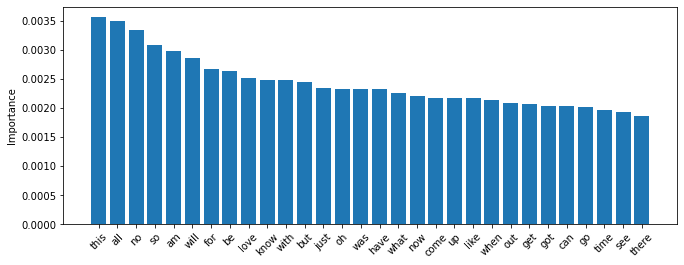

In [59]:
# Max training score

best_test_idx = np.argmax(test_accuracies)
print("Depth %d" % depths[best_test_idx])
words, imps = show_imp_words(clf_models[best_test_idx], 20)

fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.bar(words, imps, width=0.8, bottom=None, align='center', data=None)
ax.set_ylabel('Importance')
x=ax.set_xticklabels( labels=words, rotation=45 )


Depth 14


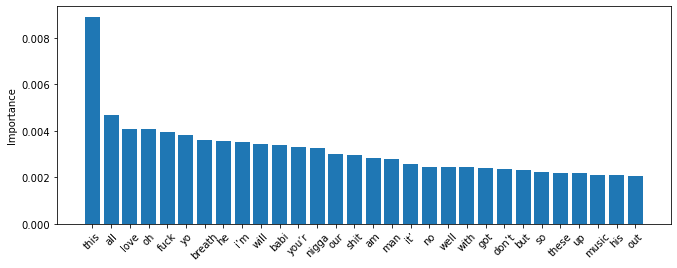

In [58]:
# Most similar training and testing accuracy

most_sim_idx = np.argmin(np.absolute(test_accuracies - train_accuracies))
print("Depth %d" % depths[most_sim_idx])
sim_words, sim_imps = show_imp_words(clf_models[most_sim_idx], 20)

fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.bar(sim_words, sim_imps, width=0.8, bottom=None, align='center', data=None)
ax.set_ylabel('Importance')
x=ax.set_xticklabels( labels=sim_words, rotation=45 )

Depth 12


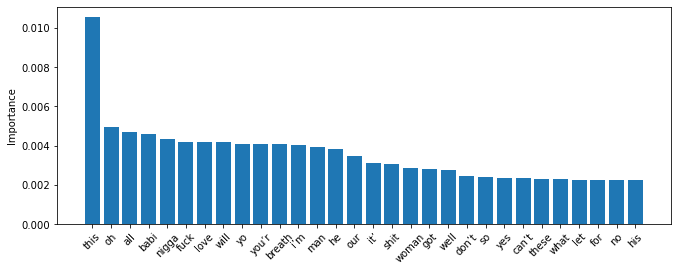

In [88]:
# When do training and testing start to diverge?

idx = 5 
print("Depth %d" % depths[idx])
sim_words, sim_imps = show_imp_words(clf_models[idx], 20)

fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.bar(sim_words, sim_imps, width=0.8, bottom=None, align='center', data=None)
ax.set_ylabel('Importance')
x=ax.set_xticklabels( labels=sim_words, rotation=45 )